морозов вариант 14

a=4
cigma^2=9
n=90
q=1,35
k=5
правило скотта
зр 
Треугольное на отрезке (0, 5) и модой, равной 3

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import norm

    1. Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,2).
        Правило скотта  k = 3.5 * σ * n^(-1/3).

In [ ]:

a = 4 # среднее значение
sigma = 3 # стандартное отклонение
n_points = 90 # размер выборки

# генерация выборки
sample = norm.rvs(loc=a, scale=sigma, size=n_points)

# группировка данных в интервалы и нахождение интервального ряда абсолютных частот
n_intervals = 10 # число интервалов группировки
hist, bins = np.histogram(sample, bins=n_intervals)
print("Интервальный ряд абсолютных частот:", hist)

# вычисление суммы абсолютных частот
sum_freq = sum(hist)
print("Сумма абсолютных частот:", sum_freq)

# построение диаграммы абсолютных частот
plt.hist(sample, bins=n_intervals)
plt.title("Диаграмма абсолютных частот")
plt.show()

# группировка данных в интервалы и нахождение интервального ряда относительных частот
rel_freq = hist / sum_freq # относительные частоты
print("Интервальный ряд относительных частот:", rel_freq)

# вычисление суммы относительных частот
sum_rel_freq = sum(rel_freq)
print("Сумма относительных частот:", sum_rel_freq)

# построение диаграммы относительных частот
plt.bar(bins[:-1], rel_freq, width=(bins[1]-bins[0]))
plt.title("Диаграмма относительных частот")
plt.show()

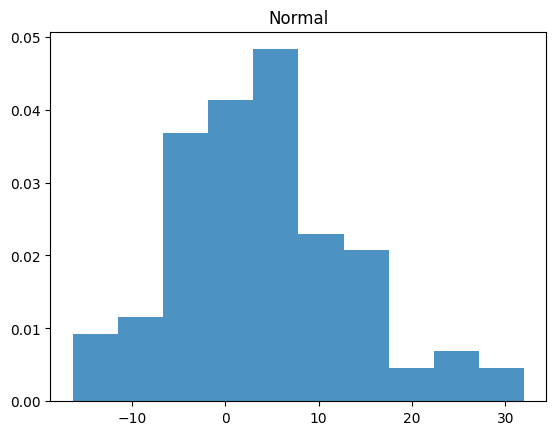

In [73]:


def plot_norm(a,sigma,n_points):
    """
        отрисовывает распределение случайных точек по равномерному нормальному закону.
        a — параметр, характеризующий среднее значение
        sigma — параметр, характеризующий разброс параметров
    """
    r = sts.norm.rvs(loc=a,scale=sigma, size=n_points)   # генерация выборки
    plt.hist(r, density=True, histtype='stepfilled',alpha=0.8)
    plt.title('Normal')
    return r



a=4
sigma=9
n=90
X=plot_norm(a,sigma,n)



        1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом Скотта, указанном в Вашем варианте. Вычислить средствами Python сумму абсолютных частот. Построить диаграмму абсолютных частот.

Интервальный ряд абсолютных частот: [ 7 16 27 23 11  3  3]
Сумма абсолютных частот: 90


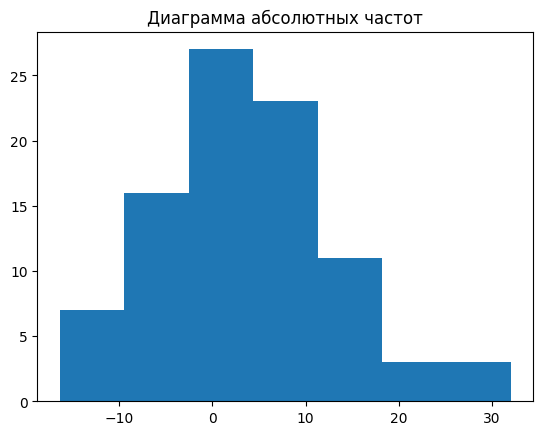

In [82]:
def plot_intervals_absolute(X,sigma,n_points):
     # группировка данных в интервалы и нахождение интервального ряда абсолютных частот
    n_intervals =3.5*sigma* n_points**(-1/3) # число интервалов группировки правилом скотта
    hist, bins_absolute = np.histogram(X, bins=int(n_intervals))
    print("Интервальный ряд абсолютных частот:", hist)

    sum_freq_absolute = sum(hist)
    print("Сумма абсолютных частот:", sum_freq_absolute)# построение диаграммы абсолютных частот
    plt.hist(X, bins=int(n_intervals))
    plt.title("Диаграмма абсолютных частот")
    plt.show()
    return hist,bins_absolute,sum_freq_absolute,n_intervals


hist,bins_absolute,sum_freq_absolute,n_intervals_scot    =plot_intervals_absolute(X,sigma,n)



1.2. Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить диаграмму относительных частот.

Интервальный ряд относительных частот: [0.07777778 0.17777778 0.3        0.25555556 0.12222222 0.03333333
 0.03333333]
Сумма относительных частот: 1.0


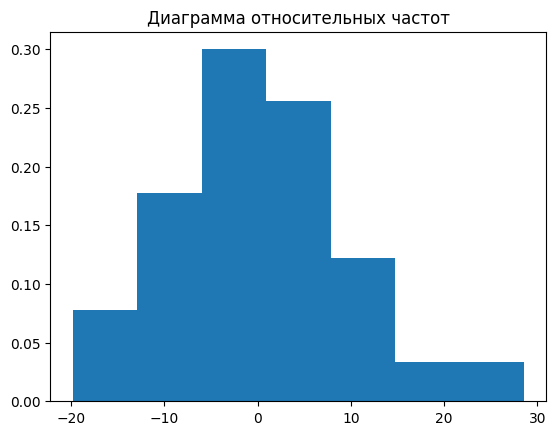

In [83]:
def plot_intervals_relative(X,sigma,n_points):
     # группировка данных в интервалы и нахождение интервального ряда относительных частот
    rel_freq = hist / sum_freq_absolute # относительные частоты
    print("Интервальный ряд относительных частот:", rel_freq)


    sum_rel_freq = sum(rel_freq) # вычисление суммы относительных частот
    print("Сумма относительных частот:", sum_rel_freq)

    # построение диаграммы относительных частот
    plt.bar(bins_absolute[:-1], rel_freq, width=(bins_absolute[1]-bins_absolute[0]))
    plt.title("Диаграмма относительных частот")
    plt.show()

plot_intervals_relative(X,sigma,n)


    2. Для визуализации данных:
        2.1. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).
        2.2. Построить гистограмму абсолютных и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).
        2.3. Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения  случайной величины X, разместив их на одном рисунке.
        2.4. Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

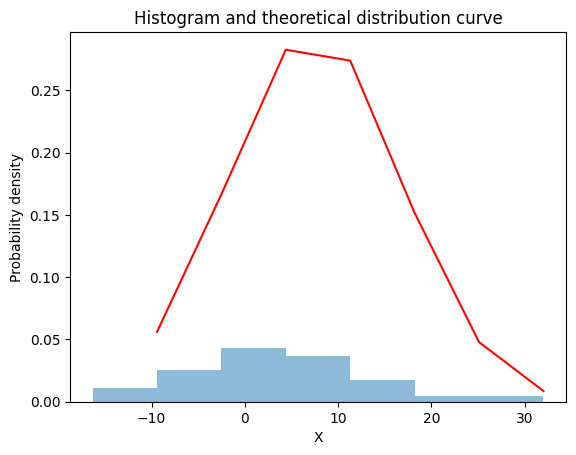

In [81]:
def plot_histogram_and_teoretical(r,bin_edges,a,sigma):
    # вычисляем теоретические значения вероятностей попадания в каждый интервал группировки
    theor_prob = norm.cdf(bin_edges[1:], loc=a, scale=sigma) - norm.cdf(bin_edges[:-1], loc=a, scale=sigma)

    # строим гистограмму относительных частот и теоретическую кривую распределения
    plt.hist(r, bins=bin_edges, density=True, alpha=0.5)
    plt.plot(bin_edges[1:], theor_prob, 'r')
    plt.xlabel('X')
    plt.ylabel('Probability density')
    plt.title('Histogram and theoretical distribution curve')
    plt.show()

plot_histogram_and_teoretical(X,bins_absolute,a,sigma)


Проанализировав результаты п.1 и 2., ответить на следующие вопросы:
    A) Какова Ваша оценка вероятности попадания значений случайной  величины X в k-ый интервал полученной группировки?
    B)  Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике.
    C) Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений случайной  величины X в k-ый интервал, покажите ее на графике.
    D) Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки? А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?

    3. Используя таблицу значений функции Лапласа, найти вероятность 
(вычисления вероятности сделать “вручную” )
P(|X-MX|<q)                                            (*)
     3.1. Найти вероятность (*), используя встроенные функции Python.
3.2. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 
{|X-MX|<q}.
3.3. Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).

Часть II.

4.Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса двумя способами:
4.1.  первый способ –непосредственное применение формул для вычисления   точечных оценок;
4.2.  второй способ – применение встроенных функций Python, например,  describe, std, mean  и т.д.
4.3. Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.
Проанализировав результаты п.4, ответить на следующие вопросы:
    A) Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? 
    B)  Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. 
    C) Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?